# Keras implementation

In [1]:
import numpy as np
from scipy.stats import mstats, spearmanr, pearsonr
from scipy.spatial.distance import cosine, correlation

In [2]:
voc = [
    'above', 'below',
    'over', 'under',
    'next_to', 'away_from',
    'near_to', 'far_from',
    'left_of', 'right_of',
]

In [3]:
voc_rep_org = [
    # above
    np.array([
        [7.00, 7.66, 8.10, 8.61, 8.19, 7.32, 7.66],
        [6.69, 6.56, 7.66, 8.55, 7.13, 7.16, 6.88],
        [5.63, 6.41, 7.09, 8.53, 7.35, 6.74, 5.53],
        [1.94, 2.16, 1.88, 0.00, 1.97, 1.88, 2.00],
        [1.94, 1.78, 1.66, 1.13, 1.63, 2.41, 1.66],
        [1.81, 1.94, 1.42, 1.03, 1.50, 1.84, 1.58],
        [1.44, 1.38, 1.34, 1.19, 1.34, 2.08, 1.44],
    ], dtype=np.float128),
    # below
    np.array([
        [1.50, 1.66, 1.29, 1.03, 1.33, 1.75, 1.59],
        [1.71, 2.09, 1.40, 1.31, 1.44, 1.66, 1.45],
        [1.94, 2.09, 1.65, 1.72, 1.88, 2.39, 2.00],
        [2.16, 2.29, 2.03, 0.00, 2.41, 1.94, 2.00],
        [5.66, 6.31, 6.94, 8.16, 6.94, 6.00, 5.81],
        [6.00, 7.09, 7.74, 8.71, 7.78, 7.10, 6.88],
        [7.42, 5.00, 6.88, 8.40, 7.72, 7.71, 7.53],
    ], dtype=np.float128),
    # over
    np.array([
        [8.84, 7.65, 8.10, 8.90, 7.59, 7.38, 7.10],
        [6.75, 6.94, 7.19, 8.29, 7.45, 7.32, 8.41],
        [5.69, 5.97, 7.07, 8.42, 7.19, 6.38, 5.58],
        [1.91, 2.19, 2.09, 0.00, 2.13, 1.94, 2.25],
        [2.28, 1.91, 1.71, 1.28, 1.97, 2.09, 2.00],
        [1.69, 2.00, 1.28, 1.45, 2.19, 1.69, 1.66],
        [1.52, 1.59, 1.52, 1.20, 1.28, 1.66, 1.66],
    ], dtype=np.float128),
    # under
    np.array([
        [1.81, 1.94, 1.38, 1.39, 1.59, 1.72, 1.47],
        [1.83, 1.53, 2.03, 1.41, 1.44, 1.63, 1.84],
        [1.77, 1.78, 1.63, 1.44, 1.59, 1.68, 2.19],
        [2.06, 2.22, 1.91, 0.00, 2.25, 2.39, 2.00],
        [5.71, 5.66, 6.75, 8.23, 6.84, 5.88, 5.84],
        [6.59, 7.00, 7.59, 7.45, 7.38, 6.50, 6.10],
        [7.22, 7.55, 7.90, 8.72, 7.78, 7.74, 7.03],
    ], dtype=np.float128),
    # next_to
    np.array([
        [2.65, 2.06, 2.10, 2.03, 2.29, 1.94, 1.70],
        [2.84, 3.32, 3.31, 3.91, 3.35, 3.34, 2.94],
        [4.06, 4.75, 5.90, 6.70, 6.57, 4.72, 3.87],
        [4.52, 6.00, 8.17, 0.00, 8.39, 6.69, 4.88],
        [3.56, 4.59, 6.59, 6.19, 5.91, 5.38, 4.13],
        [2.94, 3.58, 3.66, 4.06, 4.00, 3.32, 3.06],
        [2.37, 2.06, 2.53, 2.31, 1.81, 2.00, 1.69],
    ], dtype=np.float128),
    # away_from
    np.array([
        [7.38, 7.94, 7.45, 7.74, 7.72, 8.10, 8.44],
        [7.41, 6.84, 5.74, 5.16, 5.69, 6.72, 7.22],
        [5.90, 4.75, 2.94, 2.91, 2.78, 5.13, 6.47],
        [5.35, 4.38, 2.13, 0.00, 1.88, 4.58, 6.25],
        [6.32, 4.81, 3.09, 2.50, 3.44, 5.41, 6.45],
        [7.28, 6.09, 5.34, 4.97, 5.41, 5.75, 7.66],
        [8.10, 7.50, 7.58, 7.63, 7.44, 7.83, 8.26],
    ], dtype=np.float128),
    # near_to
    np.array([
        [1.74, 1.90, 2.84, 3.16, 2.34, 1.81, 2.13],
        [2.61, 3.84, 4.66, 4.97, 4.90, 3.56, 3.26],
        [4.06, 5.56, 7.55, 7.97, 7.29, 4.80, 3.91],
        [4.47, 5.91, 8.52, 0.00, 7.90, 6.13, 4.63],
        [3.47, 4.81, 6.94, 7.56, 7.31, 5.59, 3.63],
        [3.25, 4.03, 4.50, 4.78, 4.41, 3.47, 3.10],
        [1.84, 2.23, 2.03, 3.06, 2.53, 2.13, 2.00],
    ], dtype=np.float128),
    # far_from
    np.array([
        [7.48, 7.94, 7.56, 7.42, 7.38, 7.88, 8.48],
        [6.56, 5.78, 5.41, 5.41, 5.19, 5.38, 7.03],
        [5.69, 4.03, 2.28, 1.78, 2.84, 4.13, 6.06],
        [5.59, 3.44, 1.87, 0.00, 1.66, 4.22, 5.71],
        [6.90, 4.56, 2.28, 1.81, 2.31, 4.09, 6.13],
        [7.09, 6.03, 4.88, 5.19, 5.16, 6.00, 7.42],
        [7.68, 7.77, 7.58, 7.13, 7.47, 7.78, 8.41],
    ], dtype=np.float128),
    # left
    np.array([
        [6.56, 5.65, 5.28, 2.56, 2.13, 1.88, 1.66],
        [7.00, 6.06, 5.39, 2.25, 2.16, 1.53, 1.80],
        [7.13, 6.52, 6.34, 2.31, 2.47, 1.94, 2.10],
        [8.35, 7.83, 8.06, 0.00, 1.10, 1.59, 1.94],
        [6.84, 6.39, 6.65, 2.16, 2.03, 2.10, 1.41],
        [6.03, 6.23, 5.63, 2.48, 1.90, 2.22, 1.59],
        [6.16, 5.77, 4.94, 1.90, 1.94, 1.94, 2.03],
    ], dtype=np.float128),
    # right
    np.array([
        [1.72, 1.97, 1.66, 2.22, 5.50, 6.45, 6.59],
        [1.90, 2.00, 2.00, 2.28, 5.78, 6.52, 7.06],
        [1.33, 1.63, 2.13, 2.39, 6.39, 6.84, 7.03],
        [1.09, 1.35, 1.38, 0.00, 8.35, 8.52, 8.71],
        [1.69, 1.74, 2.25, 2.09, 6.03, 6.81, 7.50],
        [1.66, 1.94, 1.81, 2.03, 5.59, 6.72, 6.63],
        [1.50, 1.72, 1.94, 1.87, 5.47, 6.13, 6.44],
    ], dtype=np.float128),
]

# Matrix to Vector (remove the extra center point):
voc_rep_vec = [
    mat[mat>1]
    for mat in voc_rep_org
]

# min-max normalization of parameter (x-min)/(max-min) => just change in scale of the judgments
def minmax_normal(repres, max_val= 9, min_val = 1):
    return (repres-min_val)/(max_val-min_val)

def minmax_normal_(repres):
    max_val = np.max(repres)
    min_val = np.min(repres)
    if (max_val-min_val) == 0:
        return repres*0
    return (repres-min_val)/(max_val-min_val)

# max normalization (at least one of the values is equal to 1) => just change in scale of the judgments
def max_normal(repres):
    max_val = np.max(repres)
    if max_val == 0:
        return repres*0
    return repres/max_val

# additive normalization of parameter x/sum(x') => just change in scale of the judgments
def additive_normal(repres):
    return repres/repres.sum()

# euclidean distance as probability ===> P(X=x) = x^2
def euclidean_normal(repres):
    repres = np.array(repres)
    eucl_sum = np.sqrt((repres*repres).sum())
    return repres/eucl_sum

# logits of probabilities exp(x)/sum(exp(x'))
def softmax(repres):
    exp_rep = np.exp(repres)
    return exp_rep/exp_rep.sum()

def sigmoid(repres):
    exp_neg_rep = np.exp(-repres)
    return 1/(1+exp_neg_rep)

def tan(repres):
    return np.tan(np.pi * (repres * 2 - 1) / 2)

def relu(repres):
    return repres * (repres > 0)

def leaky_relu(repres):
    scales = (np.ones(repres.shape)/100) * (repres < 0) + np.ones(repres.shape) * (repres > 0)
    return repres * scales

In [4]:
def plot_the_repres(repres_matrix, titles, normalization=lambda x: x, zoom=1, filename=None, fontsize=None, enumerization=None):
    fig = plt.figure()
    plot_shape = [1,1,1]
    plot_shape[0] = len(repres_matrix)
    plot_shape[1] = len(repres_matrix[0])
    
    repres_list = [
        repres
        for repres_l in repres_matrix
        for repres in repres_l
    ]

    for n, repres in enumerate(repres_list):
        title = titles[n]
        plot_shape[2] = n+1
        ax = fig.add_subplot(*plot_shape, aspect='equal')

        # we need this scaling factor for visualization purposes
        scaling_value = 200 * zoom / ((plot_shape[0]*plot_shape[1]))

        repres_normal = scaling_value * normalization(repres)

        for y in range(7):
            for x in range(7):
                pointer = x  + 7 * y
                pointer = pointer if pointer < 25 else pointer-1
                ax.scatter([[x+0.5]], [[6-y+0.5]], c=[(0,0,0,1)], marker='o', s=[int(repres_normal[pointer])],linewidths=0)

        ax.add_patch(
            patches.Rectangle(
                (3, 3),   # (x,y)
                1.,          # width
                1.,          # height
                hatch='\\\\',
                facecolor="#999999",
            )
        )
        
        title_scale = (1 if len(title) < 70/(1+plot_shape[1]) else 70/(plot_shape[1]+1)/len(title))
        
        
        if fontsize is not None:
            ax.set_title(title, fontdict={'fontsize': fontsize})
        else:
            ax.set_title(title, fontdict={'fontsize': 10 * title_scale})
        #ax.set_axis_off()
        #ax.set_frame_on(True)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim((0,7))
        ax.set_ylim((0,7))
        ax.grid('on',linestyle='solid', color='#aaaaaa')
        if enumerization is not None:
            ax.set_xlabel(enumerization(n))
            
        #ax.set_xlabel('X')
        #ax.set_ylabel('Y')
        
    
    #plt.tight_layout(pad=0.75)
    #plt.subplots_adjust(top=1)#, right=1.)
    #plt.show()
    #plt.close('all')
    return fig

### Artificial data generation

In [5]:
extras_voc = ['<pad/>', '<s>', '</s>']
operators_voc = ['and', 'not', 'or', 'either']
supplementary = ['the', 'it', 'object', 'ball', 'is', 'box', '.']
extended_voc = extras_voc + voc + operators_voc + supplementary

def to_string(word_ids):
    return ' '.join([extended_voc[word_id] for word_id in word_ids if extended_voc[word_id] not in extras_voc])


In [6]:
phrase_simple = []
phrase_simple_vec = []

def simple_grammar(word_id, no_random=False, all_out=False):
    templates = [[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        word_id,
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index('<s>'),
        word_id,
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ]]

    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]



def and_grammar(word_id_1, word_id_2, no_random=False, all_out=False):
    templates = [[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index('<s>'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
    ]]

    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]

def neg_grammar(word_id, no_random=False, all_out=False):
    templates = [[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index('<s>'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ]]
    
    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]

def or_grammar(word_id_1, word_id_2, no_random=False, all_out=False):
    templates = [[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('.'),
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index('</s>'),
    ],[
        extended_voc.index('<s>'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('</s>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
        extended_voc.index('<pad/>'),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index('<s>'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('</s>'),
    ]]

    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]


# function application: and(right_of, under)
def apply_grammar(phrase):
    return phrase[1](*phrase[0])
    
def activation_n(vec,n):
    return np.array(n*np.array(vec, np.float), np.int)/n
    
# simple words
for word_id, word_vec in enumerate(voc_rep_vec):
    phrase = ([word_id+len(extras_voc)], simple_grammar)
    phrase_vec = minmax_normal(word_vec)
    phrase_simple.append(phrase)
    phrase_simple_vec.append(phrase_vec)
    print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))
    #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
    #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))
    
# and-compositions
phrase_and = []
phrase_and_vec = []
for word_id_1, word_vec_1 in enumerate(voc_rep_vec):
    for word_id_2, word_vec_2 in enumerate(voc_rep_vec):
        # ignore cases like "right and right"
        if (word_id_1 == word_id_2):
            continue
        phrase = ([word_id_1+len(extras_voc), word_id_2+len(extras_voc)], and_grammar)
        phrase_vec = np.prod([minmax_normal(word_vec_1), minmax_normal(word_vec_2)],axis=0)
        print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))
        
        if np.sum(phrase_vec) > 0.0:
            phrase_and.append(phrase)
            phrase_and_vec.append(phrase_vec)
            
            #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
            #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))

# negations
phrase_neg = []
phrase_neg_vec = []
for word_id, word_vec in enumerate(voc_rep_vec):
    phrase = ([word_id+len(extras_voc)], neg_grammar)
    phrase_vec = (1-minmax_normal(word_vec))
    print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))

    if np.sum(phrase_vec) > 0.0:
        phrase_neg.append(phrase)
        phrase_neg_vec.append(phrase_vec)
                            
        #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
        #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))
                            
# or-compositions
phrase_or = []
phrase_or_vec = []
for word_id_1, word_vec_1 in enumerate(voc_rep_vec):
    for word_id_2, word_vec_2 in enumerate(voc_rep_vec):
        # ignore cases like "right or right"
        if (word_id_1 == word_id_2):
            continue
        phrase = ([word_id_1+len(extras_voc), word_id_2+len(extras_voc)], or_grammar)
        phrase_vec = (minmax_normal(word_vec_1) + minmax_normal(word_vec_2))-np.prod([minmax_normal(word_vec_1), minmax_normal(word_vec_2)],axis=0)
        print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))
        
        if np.sum(phrase_vec) > 0.0:
            phrase_or.append(phrase)
            phrase_or_vec.append(phrase_vec)

            #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
            #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))


above 18.7275
below 18.43625
over 19.29375
under 18.4225
next_to 17.5925
away_from 29.4825
near_to 19.63625
far_from 27.48375
left_of 17.49125
right_of 17.79375
above and below 2.529821875
above and over 13.4868953125
above and under 2.5656125
above and next_to 6.1881234375
above and away_from 12.010059375
above and near_to 7.3172046875
above and far_from 11.09536875
above and left_of 6.5603859375
above and right_of 6.793471875
below and above 2.529821875
below and over 2.7470546875
below and under 12.3754390625
below and next_to 6.3545921875
below and away_from 11.5019625
below and near_to 7.15351875
below and far_from 10.8527953125
below and left_of 6.2053671875
below and right_of 6.577484375
over and above 13.4868953125
over and below 2.7470546875
over and under 2.7951421875
over and next_to 6.3752640625
over and away_from 12.396903125
over and near_to 7.48366875
over and far_from 11.477334375
over and left_of 6.8025140625
over and right_of 6.9941625
under and above 2.5656125
under 

### Data generation based on the score

In [7]:
phrases     = phrase_simple     + phrase_and     + phrase_neg     + phrase_or
phrase_vecs = phrase_simple_vec + phrase_and_vec + phrase_neg_vec + phrase_or_vec

phrase_ids = list(range(len(phrases)))


In [8]:
phrases_string = [
    to_string(phrase[1](*phrase[0], no_random=True))
    for phrase in phrases
]

In [9]:
#phrase_vecs = activation_n(phrase_vecs, 48)

In [10]:
# 20% out phrases are removed from the corpus
holdout_split = 0.50
np.random.seed(404) # ;-)
# be fair on all categories on choosing random OOC:
out_of_corpus_phrases_ = [phrase_simple[rid] for rid in np.random.choice(np.arange(len(phrase_simple)), int(len(phrase_simple)*holdout_split))] +\
                        [phrase_and[rid] for rid in np.random.choice(np.arange(len(phrase_and)), int(len(phrase_and)*holdout_split))] +\
                        [phrase_neg[rid] for rid in np.random.choice(np.arange(len(phrase_neg)), int(len(phrase_neg)*holdout_split))] +\
                        [phrase_or[rid] for rid in np.random.choice(np.arange(len(phrase_or)), int(len(phrase_or)*holdout_split))]
out_of_corpus_phrases = [
    to_string(phrase[1](*phrase[0], no_random=True))
    for phrase in out_of_corpus_phrases_
]

out_of_corpus = [
    phrases_string.index(phrase)
    for phrase in out_of_corpus_phrases
]

frequency_scale = 5
corpus = [
    (sentence, loc)
    for phrase_id, phrase_vec in enumerate(phrase_vecs)
    if phrase_id not in out_of_corpus and np.sum(phrase_vec) > 0.0
    for loc in range(48)
    for _ in range(int(frequency_scale * phrase_vec[loc]))
    for sentence in phrases[phrase_id][1](*phrases[phrase_id][0], all_out=True)
]

np.random.shuffle(corpus)

In [11]:
for phrase_id, phrase in enumerate(phrases):
    print("(OOC)" if phrase_id in out_of_corpus else "     ", to_string(phrase[1](*phrase[0], no_random=True)))

      above
(OOC) below
      over
      under
(OOC) next_to
      away_from
(OOC) near_to
(OOC) far_from
      left_of
      right_of
      above and below
      above and over
(OOC) above and under
(OOC) above and next_to
      above and away_from
(OOC) above and near_to
      above and far_from
      above and left_of
      above and right_of
(OOC) below and above
(OOC) below and over
(OOC) below and under
(OOC) below and next_to
      below and away_from
(OOC) below and near_to
      below and far_from
(OOC) below and left_of
      below and right_of
      over and above
(OOC) over and below
      over and under
      over and next_to
      over and away_from
(OOC) over and near_to
      over and far_from
      over and left_of
      over and right_of
(OOC) under and above
      under and below
(OOC) under and over
      under and next_to
      under and away_from
      under and near_to
      under and far_from
(OOC) under and left_of
      under and right_of
      next_to and abo

### Keras Model

In [12]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers import Input, Merge, Flatten, Embedding, RepeatVector, Reshape, TimeDistributed, Lambda, Permute
from keras.layers import merge
from keras.layers import Dropout, Bidirectional
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.models import load_model
from keras.optimizers import Adam

from keras import backend as K

import os.path as op
root_dir = '~/learn_to_compose/'
model_root_dir = op.join(root_dir, "models")
checkpoint_path = op.join(model_root_dir, "model_third_kl_or-50-simple.{epoch:02d}-{val_loss:.2f}.hdf5")
csv_log_path = op.join(model_root_dir, 'model_third_kl_or-50-simple.log')

Using TensorFlow backend.


In [13]:
TEST_SPLIT = len(corpus) #int(0.1 * len(corpus))
SENTENCE_LEN = len(corpus[0][0])-1
VOCAB_SIZE = len(extended_voc)
EMBEDDING_SIZE = 15
SENSOR_RESOLUTION = 48

## keras preparation
X_input = []
C_input = []
X_target = []
for sentence, sensor in corpus:
    X_input.append(sentence[:-1])
    X_target.append(np.eye(VOCAB_SIZE)[sentence[1:]])
    C_input.append(np.eye(SENSOR_RESOLUTION)[sensor])

#X_input = np.array(X_input)
#C_input = np.array(C_input).reshape()
#X_target = np.array(X_target)

In [14]:
np.array(X_input).shape,SENTENCE_LEN

((10163, 5), 5)

### Components of the model

In [15]:
# word_ids must be transformed into embedding vectors.
word_to_embedding_layer = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_SIZE, input_length=SENTENCE_LEN),#, mask_zero=True), #, trainable=False),
    Dropout(0.3)
])

# sensor vectors must be repeated with number of words in sentence.
sensor_repeater_layer = Sequential([
    RepeatVector(SENTENCE_LEN, input_shape=(SENSOR_RESOLUTION,)),
])

# compose the words, and sensors, then predict the sentence again!
composer_layer = Sequential([
    #GRU(16, return_sequences=True, dropout_U=0., dropout_W=0.1, input_shape=(SENTENCE_LEN, EMBEDDING_SIZE+SENSOR_RESOLUTION)),
    LSTM(16, return_sequences=True, dropout_U=0., dropout_W=0.1, input_shape=(SENTENCE_LEN, EMBEDDING_SIZE+SENSOR_RESOLUTION)),
    TimeDistributed(Dense(VOCAB_SIZE, activation="softmax")),
])


### LSTM based language model

In [16]:
# Final graph:
sentence_input    = Input(shape=(SENTENCE_LEN,))
sensor_input      = Input(shape=(SENSOR_RESOLUTION,))
embeddings        = word_to_embedding_layer(sentence_input)
sensors           = sensor_repeater_layer(sensor_input)
embedding_sensors = merge([embeddings, sensors], mode='concat')
output_repres     = composer_layer(embedding_sensors)

lm_model = Model(
    [sentence_input, sensor_input],
    output_repres
)

# add back propagation of the gradient descents (optimizer) with loss function
lm_model.compile(
    optimizer='nadam',
    #loss='kullback_leibler_divergence',
    loss='categorical_crossentropy',
)


In [17]:
# Train!
lm_model.fit(
    [np.array(X_input[:TEST_SPLIT]), np.array(C_input[:TEST_SPLIT])], # training input
    np.array(X_target[:TEST_SPLIT]), # training outputs
    nb_epoch=2**6, 
    batch_size=2**3,
    validation_split=0.1,
    callbacks=[ModelCheckpoint(checkpoint_path), CSVLogger(csv_log_path)],
    verbose=0
)

In [18]:
#lm_model = load_model('/home/mehdi/learn_to_compose/models/model_third_kl_or-30.273-0.56.hdf5')

#### Evaluation

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [20]:
phrases_repres_vec = []

phrases_extended = [
    (phrase, phrase_id)
    for phrase_id, (arg, fn) in enumerate(phrases)
    for phrase in fn(*arg, all_out=True)
]
print(np.array([
            desc[:-1]
            for desc, _ in phrases_extended
        ]).shape)
for location in range(48):
    p_logits = lm_model.predict([
        np.array([
            desc[:-1]
            for desc, _ in phrases_extended
        ]),
        np.array([np.eye(SENSOR_RESOLUTION)[location]]*len(phrases_extended))
    ])
    
    phrases_repres_vec.append(p_logits)
    

extras_voc_ids = [extended_voc.index(extras) for extras in extras_voc]
learned_repre_vecs = []
phrase_vec_gold = phrase_simple_vec + phrase_and_vec + phrase_neg_vec + phrase_or_vec
correlations = []
cosines = []
for phrase_id, (phrase, org_phrase_id) in enumerate(phrases_extended):
    phrase_vec = np.array([
        #mstats.gmean([
        #    loc[phrase_id, word_order, word_id]
        #    for word_order, word_id in enumerate(phrase[1:])
        #    if word_id not in extras_voc_ids
        #])
        np.prod([
            loc[phrase_id, word_order, word_id]
            for word_order, word_id in enumerate(phrase[1:])
#            if word_id not in extras_voc_ids
            if word_order < phrase[1:].index(extras_voc.index('</s>'))
        ])
        for loc in phrases_repres_vec
    ])
    #to_string(phrases[0])
    #print(phrase_vec)
    #plot_the_repres(phrase_vec, to_string(phrase), normalization=lambda x: max_normal(relu(x-np.mean(x))), zoom=1, filename="learned")
    #plot_the_repres(phrase_vec, to_string(phrase), normalization=minmax_normal_, zoom=1)
    #plot_the_repres(phrase_vec_gold[org_phrase_id], to_string(phrase), normalization=minmax_normal_, zoom=1, filename="trained")
    correlations.append(spearmanr(phrase_vec_gold[org_phrase_id],minmax_normal_(phrase_vec)))
    cosines.append(cosine(phrase_vec_gold[org_phrase_id],phrase_vec))
    learned_repre_vecs.append(
        (
            phrase_vec,
            phrase_vec_gold[org_phrase_id],
            to_string(phrase),
            spearmanr(phrase_vec_gold[org_phrase_id],phrase_vec)[0],
            cosine(phrase_vec_gold[org_phrase_id],phrase_vec),
            correlation(phrase_vec_gold[org_phrase_id],phrase_vec),
            1 if phrase_id in out_of_corpus else 0,
        )
    )
    #print(phrase_vec_gold[phrase_id].shape, phrase_vec.shape)
    if phrase_id in out_of_corpus:
        print("out_of_corpus")
    print(to_string(phrase), spearmanr(phrase_vec_gold[org_phrase_id],minmax_normal_(phrase_vec))) #, pearsonr(phrase_vec_gold[phrase_id],phrase_vec))

(200, 5)
above SpearmanrResult(correlation=0.91106531058684626, pvalue=2.5397557288302166e-19)
out_of_corpus
below SpearmanrResult(correlation=0.87940068360845258, pvalue=1.9714111205545157e-16)
over SpearmanrResult(correlation=0.91667805500051569, pvalue=6.0308379836291693e-20)
under SpearmanrResult(correlation=0.94900258151458228, pvalue=1.0696321758338905e-24)
out_of_corpus
next_to SpearmanrResult(correlation=0.91157312446887984, pvalue=2.2388074809295474e-19)
away_from SpearmanrResult(correlation=0.94691418475271338, pvalue=2.6322995668929497e-24)
out_of_corpus
near_to SpearmanrResult(correlation=0.70422841117693913, pvalue=2.3380488000116895e-08)
out_of_corpus
far_from SpearmanrResult(correlation=0.63011616916779367, pvalue=1.5939723858728522e-06)
left_of SpearmanrResult(correlation=0.87513921410042128, pvalue=4.178005708943149e-16)
right_of SpearmanrResult(correlation=0.85957008431874682, pvalue=5.2340331530839553e-15)
above and below SpearmanrResult(correlation=0.188558402084237

In [21]:
#s = pd.Series(list(zip(*correlations))[0], index=[str(phrase_id) for phrase_id, (phrase, org_phrase_id) in enumerate(phrases_extended)])
s = pd.Series(list(zip(*correlations))[0], index=[to_string(phrase) for phrase_id, (phrase, org_phrase_id) in enumerate(phrases_extended)])
#s = pd.Series(list(zip(*correlations))[0], index=[str(phrase_id) for phrase_id, phrase in enumerate(phrases)])

In [22]:
simple_phrases_results = s[[to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_simple]]
and_phrases_results    = s[[to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_and]]
neg_phrases_results    = s[[to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_neg]]
or_phrases_results     = s[[to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_or]]
simple_results = s[
    [to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_simple]+\
    [to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_and]+\
    [to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_neg]+\
    [to_string(phrase[1](*phrase[0], no_random=True)) for phrase in phrase_neg]   
]

In [23]:
pd.Series(dict([('total average + distractors', s.mean()),
('total average', simple_results.mean()),
('SINGLE-word', simple_phrases_results.mean()),
('AND-phrases', and_phrases_results.mean()),
('NEG-phrases', neg_phrases_results.mean()),
('OR-phrases', or_phrases_results.mean())]))

AND-phrases                    0.790349
NEG-phrases                    0.076438
OR-phrases                     0.677663
SINGLE-word                    0.858369
total average                  0.677032
total average + distractors    0.707346
dtype: float64

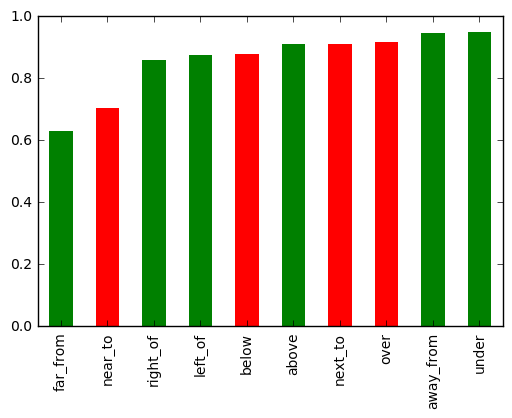

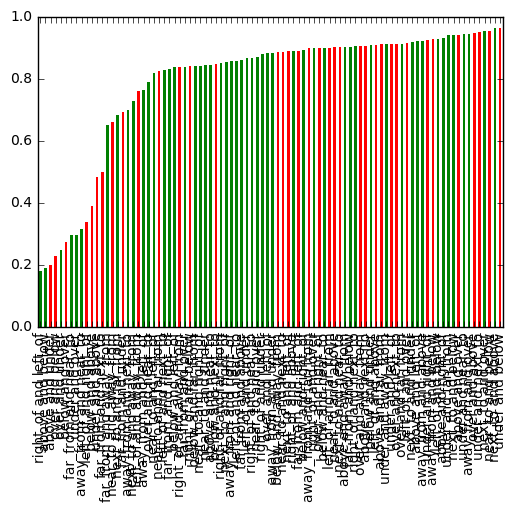

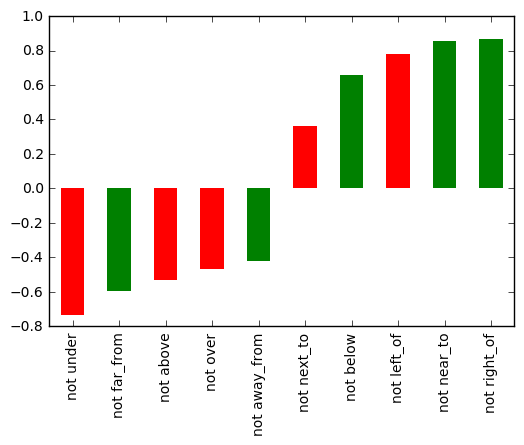

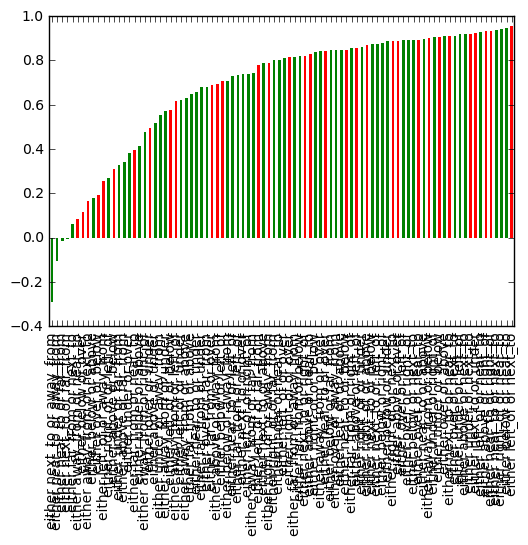

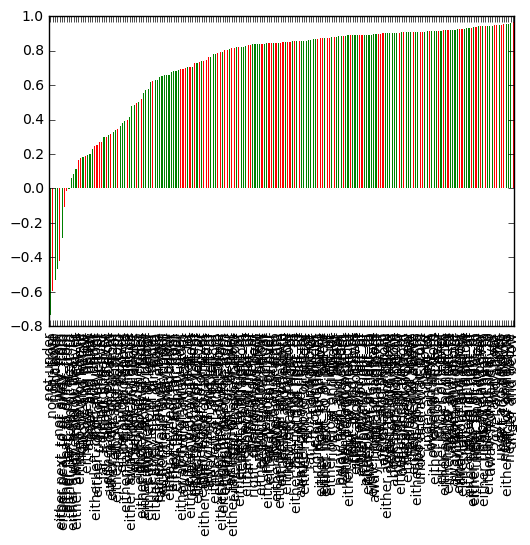

In [24]:
simple_phrases_results.sort_values().plot(
    kind='bar',
    stacked=True,
    edgecolor = "none",
    color=['r' if phrase in out_of_corpus_phrases else 'g' for phrase in simple_phrases_results.index]
)
plt.show()

and_phrases_results.sort_values().plot(
    kind='bar',
    stacked=True,
    edgecolor = "none",
    color=['r' if phrase in out_of_corpus_phrases else 'g' for phrase in and_phrases_results.index]
)
plt.show()

neg_phrases_results.sort_values().plot(
    kind='bar',
    stacked=True,
    edgecolor = "none",
    color=['r' if phrase in out_of_corpus_phrases else 'g' for phrase in neg_phrases_results.index],
)
plt.show()

or_phrases_results.sort_values().plot(
    kind='bar',
    stacked=True,
    edgecolor = "none",
    color=['r' if phrase in out_of_corpus_phrases else 'g' for phrase in or_phrases_results.index],
)
plt.show()

s.sort_values().plot(kind='bar', edgecolor = "none", color=['r' if phrase in out_of_corpus_phrases else 'g' for phrase in s.index],)
plt.show()